In [1]:
from bs4 import BeautifulSoup

In [2]:
# bs4 기본 이해

html = """
<html>
<head><title> test site </title></head>
<p class='class1' align="left">test3</p>
<p class='class1'>test2</p>
<p id='p1'>오늘의 주가지수 1500</p>
<span class='class3'>span tag text</span>
<p class='class4'>test3</p>
</html>
"""

soup = BeautifulSoup(html, "lxml")
print(soup.prettify())

<html>
 <head>
  <title>
   test site
  </title>
 </head>
 <body>
  <p align="left" class="class1">
   test3
  </p>
  <p class="class1">
   test2
  </p>
  <p id="p1">
   오늘의 주가지수 1500
  </p>
  <span class="class3">
   span tag text
  </span>
  <p class="class4">
   test3
  </p>
 </body>
</html>



In [3]:
# children 개념 이해

list(soup.children)

[<html>
 <head><title> test site </title></head>
 <body><p align="left" class="class1">test3</p>
 <p class="class1">test2</p>
 <p id="p1">오늘의 주가지수 1500</p>
 <span class="class3">span tag text</span>
 <p class="class4">test3</p>
 </body></html>,
 '\n']

In [4]:
list(soup.body.children)

[<p align="left" class="class1">test3</p>,
 '\n',
 <p class="class1">test2</p>,
 '\n',
 <p id="p1">오늘의 주가지수 1500</p>,
 '\n',
 <span class="class3">span tag text</span>,
 '\n',
 <p class="class4">test3</p>,
 '\n']

In [5]:
soup.body.findChildren

<bound method Tag.find_all of <body><p align="left" class="class1">test3</p>
<p class="class1">test2</p>
<p id="p1">오늘의 주가지수 1500</p>
<span class="class3">span tag text</span>
<p class="class4">test3</p>
</body>>

In [6]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [7]:
# url = 'https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after'

basic_url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page"

In [8]:
url1 = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page=1"
page = urlopen(url1)
soup = BeautifulSoup(page, "html.parser")

comment_all = soup.find_all("td", class_="title")
cnt = 1

for tag in comment_all[0].findChildren():
    print(tag)
    print('                       ')

<a class="movie color_b" href="/movie/bi/mi/basic.nhn?code=171725">스파이더맨: 뉴 유니버스</a>
                       
<div class="list_netizen_score">
<span class="st_off"><span class="st_on" style="width:60%">별점 - 총 10점 중</span></span><em>6</em>
</div>
                       
<span class="st_off"><span class="st_on" style="width:60%">별점 - 총 10점 중</span></span>
                       
<span class="st_on" style="width:60%">별점 - 총 10점 중</span>
                       
<em>6</em>
                       
<br/>
                       
<a class="report" href="#" onclick="report('chac****', 'nYVT2BqJwGGi1A3CMed2PBQd7Pzn73R5ddhnaLGSFiQ=', '곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '17551922', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>
                       


In [9]:
comment_all[0].find("a", class_="report").attrs['onclick'].split(",")[2].replace("'", "").strip()

'곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ'

In [10]:
comments = []
for comment in comment_all:
    outcome= comment.find("a", class_="report").attrs['onclick'].split(",")[2].replace("'", "").strip()
    comments.append(outcome)
print(comments)

['곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ', '이게 예술이 아니면 뭔가요?', '와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음', '명대사:헤이', '진짜 고퀄리티다....', '스파이더맨 판권을 소니가 가져야 하는 이유', '갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?', '영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ', '영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!', '이게 진짜 현대예술이지']


In [11]:
# 영화 평점의 5페이지까지 평점리뷰 정보 크롤링하기
import time

page_numbers = [1, 2, 3, 4, 5]
base_url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=171725&target=after&page="

comments = []
number_of_review = 0
for i in range(len(page_numbers)):
    page = urlopen(base_url + str(page_numbers[i]))
    soup = BeautifulSoup(page, "html.parser")
    comment_all = soup.find_all("td", class_="title")
    for comment in comment_all:
        outcome= comment.find("a", class_="report").attrs['onclick'].split(",")[2].replace("'", "").strip()
        print(outcome)
        comments.append(outcome)
        number_of_review += 1
    time.sleep(5)

print("가져온 리뷰의 총 개수는 {}개 입니다.".format(number_of_review))

곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ
이게 예술이 아니면 뭔가요?
와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출이랑 팝송같은 음악이 너무 좋았음
명대사:헤이
진짜 고퀄리티다....
스파이더맨 판권을 소니가 가져야 하는 이유
갠적으로 영화 2번이상 보고싶은거 없었는데 생겼다. 힘든요즘 힘내게 해준영화 왜 이제봤지?
영화도 재밌는데 연출이 일단 개신선하고 무엇보다 ost가 진짜 죽인다 ㅋㅋㅋㅋ
영상미 색감 액션 정말 삼박자를 다갖춘 영화에요ㅜㅜㅜ 다채로운 색의 조합이 눈을 즐겁게 만들고 화려한액션은 정말 말할것도 없네요.... 극장에서 못본게 아쉽네요 정말 재밌게 봤습니다 !!
이게 진짜 현대예술이지
스파이더맨 작품들 중에 최고.
스파이더맨 뉴 유니버스.
영화의 색감이 너무 좋다 눈이 즐거운 영화!

애니메이션 자체로도 훌륭하지만
마블에서 만든 실사판보다 더 괜찮음 스파이더맨 특유의 설정때문에 애니메이션이 더 잘 맞는듯
존잼 3번이나 봄 ♡♡♡♡
꼭보셈 어벤져스보다 재밌음
진짜 잘 만들었음. 영상미가 좋음.
내가 스파이더맨 좋아하고 좀 안다 하시는분들은 더 재밋게 볼거같아요ㅋㅋㅋ 너무 재밌었음
생각한거 보대는 재밌다킬링타임용으로는 훌륭함
전반적으로 좋으나 후반부가 너무 일본스러운 아기자기한 판타지 세계가 나와 고개를 돌리게 된다.
원작 코믹스를 그대로 옮겨놓은 듯한 영상
득특하고 창의적인 완벽한 스파이더맨 영화!

개인적으루 ost ㄹㅇ 미쳤음. 넘 좋당.
그냥 미쳤음 모든게 새롭다
애니메이션으로는 볼만 했음. 다만 실사 유니버스와는 별도로 계속 나왔으면 한다.
스파이더맨으로 더 이상 뽑아 낼게 있나 싶었는데
풀뿌리 영웅주의에 대한 감각적인 해설.
경이로운 소문 오프닝 영상보다 자꾸 스파이더맨:뉴유니버스가 떠올라 다시 봤더니역시는 역시!!!
진짜 그냥 완벽하다 ㅠ ㅅ ㅠ
지린다...역대 스파이더맨중 가장재밌었다
스뽜이더맨~ 쓰뽜이더맨~
요즘 괜찮은영화 못만들고있는것같던데 드디어 걸작하나 만들어준 소니. 내용은 평범하지

In [13]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [16]:
dict_doc = {"review": comments}
doc = pd.DataFrame(dict_doc)
doc.head()

,review
0,곤니찌와에서 ㅡ ㅡ ... 재밌다가 식었음 ㅠ
1,이게 예술이 아니면 뭔가요?
2,와 ㄹㅇ 내 인생 영화에 들어갈정도로 재밌음. 특유의 BOOM이라던가 만화같은 연출...
3,명대사:헤이
4,진짜 고퀄리티다....


In [18]:
doc.to_csv("스파이더맨 리뷰.csv", index=False)
doc.to_excel("스파이더맨 리뷰.xlsx", index=False)

In [19]:
f = open("스파이더맨 리뷰.csv", encoding="utf-8")
review = f.read()
f.close()

In [23]:
from matplotlib import rc
rc('font', family="NanumGothic")

In [24]:
%matplotlib inline
from wordcloud import WordCloud

wcloud = WordCloud('./data/D2Coding.ttf', max_words=1000, relative_scaling=0.2).generate(review)

(-0.5, 399.5, 199.5, -0.5)

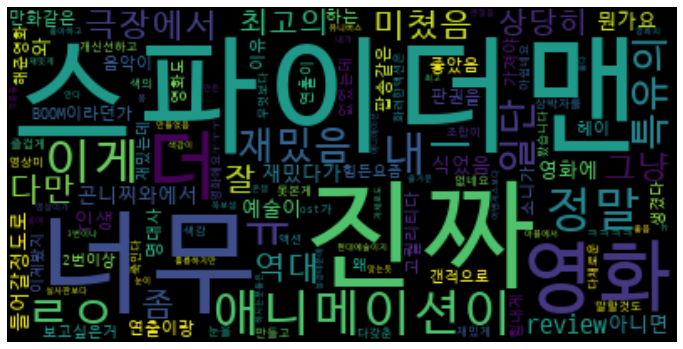

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')